<a href="https://colab.research.google.com/github/desouki76/Ahmed/blob/main/Another_copy_of_HousePricining_%3DProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Price predection


# Import Lib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.optimizers import SGD,Adagrad,RMSprop,Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler   #for scalling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Load Data

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(url)

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


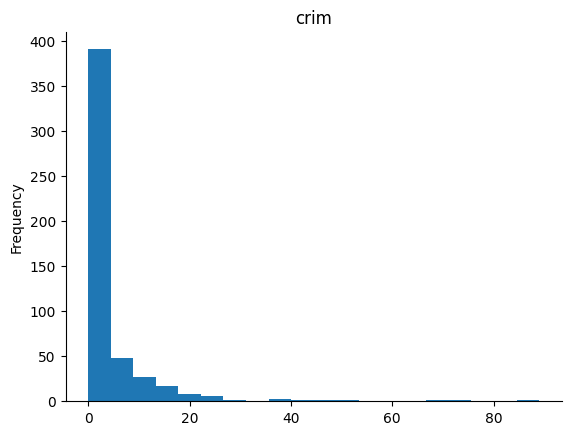

In [5]:
from matplotlib import pyplot as plt
df['crim'].plot(kind='hist', bins=20, title='crim')
plt.gca().spines[['top', 'right',]].set_visible(False)

#define input and out

define input output

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


# Data Anaylsis

In [11]:
def columns_info(df):
  #add 4 list فاديه
#1- columsn 2- Data Type 3- Unique value 4- Number of unique value
  cols=[]
  dtyp=[]
  unique_v=[]
  n_unique_v=[]
 # missing_v=[]
  for col in df.columns:  #loop on all coum names
    cols.append(col)   #append col name
    dtyp.append(df[col].dtype)  #append data tyep of each col
    unique_v.append(df[col].unique())   #add unqie values for every col
    n_unique_v.append(df[col].nunique())  #add number of unqie values

  return pd.DataFrame({'columns_name':cols,
                        'columns_dtype':dtyp,
                        'unique_sample':unique_v,
                        'n_unique_sample':n_unique_v})

   #return pd.DataFrame({'columns_name':cols, 'columns_dtype':dtyp,'unique_sample':unique_v, 'n_unique_sample':n_unique_v})


In [10]:
columns_info(df)


NameError: name 'columns_info' is not defined

#preprossing and encoding

In [9]:
#df=df.get_dumies(df, drop_first = true , np.dtype=int)
df=pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#Split the data

In [7]:
x=df.drop('medv',axis=1)
y=df['medv']


In [8]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

**bold text**

define scale for input only as no scale for output

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x_train_scaled=scaler.fit_transform(x_train) #Learn from training data dn scale it
#x_test_scaled =scaler.transform(x_test) #no scale to outpuit

#df.shape

#x_train_scaled [1]
df.columns

In [ ]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(sampling_strategy) = 'minority', k_neighbors = 5)
##smote = SMOTE(sampling_strategy='minority', k_neighbors=5)

#X_res, y_res = smote.fit_resample(x_train_scaled, y_train)
##x_res, y_res = smote.fit_resample(x_train_scaled, y_train)

In [ ]:
#import numpy as np
#print("Original:", np.bincount(y_train))
#print("Resampled:", np.bincount(y_res))

In [ ]:
x_train.shape


In [ ]:
y_train.shape


In [ ]:
print(x_train_scaled.shape, y_train.shape)
print(x_test_scaled.shape, y_test.shape)

Build the model

In [ ]:
#model=Sequential()
#model.add(Dense(64,activation='relu',input_shape=(13,)))
#model.add(Dropout(0.2)) #apply dropout after hidden layer 1
#model.add(BatchNormalization())  #apply batch normliztion after hidden layer 1
#model.add(Dense(32,activation='relu'))

#model.add(Dropout(0.2)) #apply dropout after hidden layer 1
#model.add(BatchNormalization())  #apply batch normliztion after hidden layer 1

#model.add(Dense(32,activation='relu'))

#model.add(Dropout(0.2)) #apply dropout after hidden layer 2
#model.add(BatchNormalization()) #apply scalling after hidden layer 2


#model.add(Dense(1, activation='linear')) #out multi layer for binay 1 sigmoid for binary and 32

In [13]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [18]:
#history = model.fit(x_train_scaled, y_train, epochs=50,batch_size=8, validation_data=(x_test_scaled, y_test), validation_split=0.2, verbose=1)
#history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=1)
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2479.6450 - mae: 37.9425 - val_loss: 275.1582 - val_mae: 11.8960
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1962.5554 - mae: 34.3951 - val_loss: 243.6703 - val_mae: 13.1197
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1221.3066 - mae: 26.8585 - val_loss: 79.0800 - val_mae: 6.2467
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1094.0382 - mae: 24.5757 - val_loss: 82.5620 - val_mae: 6.4256
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 968.8383 - mae: 24.4361 - val_loss: 74.6856 - val_mae: 5.7647
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 882.1346 - mae: 21.8020 - val_loss: 70.0094 - val_mae: 5.5867
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 561.1328 - mae: 18.8364 - val_loss: 123.3875 - val_mae: 8.5722
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 587.1748 - mae: 17.9358 - val_loss: 60.3492 - val_mae: 4.9860
Epoch 9/100
11/11

In [23]:
# 7. Evaluate the model
#y_pred = model.predict(x_test)
#mse = mean_squared_error(y_test, y_pred)
#mae = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)


#print(f"Test MSE: {mse}")

#print(f"Test MAE: {mae}")
#print(f"R2 Score: {r2}")
history.history.keys()


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

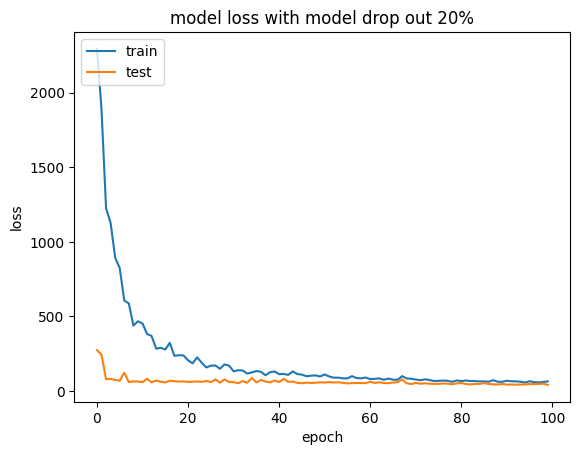

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with model drop out 20%')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


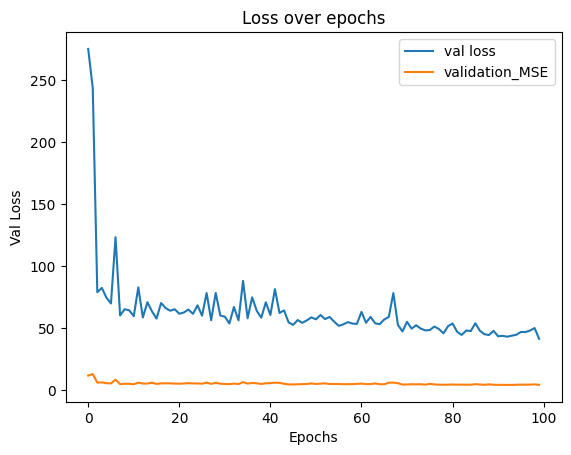

In [25]:
#plt.plot(history.history['accuracy'], label = 'Train_Loss')
#plt.plot(history.history['val_accuracy'], label = 'Test_Loss')
#plt.title('model accuracy ')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['val_mae'],label='validation_MSE')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()